In [88]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [89]:
df = pd.read_csv('data\heart_disease_health_indicators_BRFSS2015.csv')

### Feature Engineering

In [90]:
df.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0  

[5 rows x 22 columns]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [92]:
len(df.columns)

22

### Observing NaN Features

In [93]:
df.isnull()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck    BMI  Smoker  \
0                      False   False     False      False  False   False   
1                      False   False     False      False  False   False   
2                      False   False     False      False  False   False   
3                      False   False     False      False  False   False   
4                      False   False     False      False  False   False   
...                      ...     ...       ...        ...    ...     ...   
253675                 False   False     False      False  False   False   
253676                 False   False     False      False  False   False   
253677                 False   False     False      False  False   False   
253678                 False   False     False      False  False   False   
253679                 False   False     False      False  False   False   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0        False     False         False   False  ...          False   
1        False     False         False   False  ...          False   
2        False     False         False   False  ...          False   
3        False     False         False   False  ...          False   
4        False     False         False   False  ...          False   
...        ...       ...           ...     ...  ...            ...   
253675   False     False         False   False  ...          False   
253676   False     False         False   False  ...          False   
253677   False     False         False   False  ...          False   
253678   False     False         False   False  ...          False   
253679   False     False         False   False  ...          False   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk    Sex    Age  \
0             False    False     False     False     False  False  False   
1             False    False     False     False     False  False  False   
2             False    False     False     False     False  False  False   
3             False    False     False     False     False  False  False   
4             False    False     False     False     False  False  False   
...             ...      ...       ...       ...       ...    ...    ...   
253675        False    False     False     False     False  False  False   
253676        False    False     False     False     False  False  False   
253677        False    False     False     False     False  False  False   
253678        False    False     False     False     False  False  False   
253679        False    False     False     False     False  False  False   

        Education  Income  
0           False   False  
1           False   False  
2           False   False  
3           False   False  
4           False   False  
...           ...     ...  
253675      False   False  
253676      False   False  
253677      False   False  
253678      False   False  
253679      False   False  

[253680 rows x 22 columns]

In [94]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [95]:
100* df.isnull().sum() / len(df)

HeartDiseaseorAttack    0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
Diabetes                0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

## Logistic Regression

In [96]:
df.describe()

HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000       0.000000       0.000000   
25%        24.000000       0.000000       0.000000       0.000000   
50%        27.000000       0.000000       0.000000       0.000000   
75%        31.000000       1.000000       0.000000       0.000000   
max        98.000000       1.000000       1.000000       2.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [97]:
df['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [98]:
sns.countplot(data=df,x='HeartDiseaseorAttack')

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

### Train | Test Split and Scaling

In [99]:
X = df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [102]:
scaler = StandardScaler()

In [103]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression Model

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
log_model = LogisticRegression()

In [106]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [107]:
log_model.coef_

array([[ 0.26517202,  0.30108647,  0.09942735,  0.00380317,  0.17851769,
         0.19399348,  0.10303753,  0.0124283 ,  0.00704546,  0.02060791,
        -0.06808328, -0.00519067,  0.06854145,  0.52729013,  0.01767801,
         0.01098063,  0.10925778,  0.37575423,  0.78055498,  0.01127943,
        -0.08607367]])

### Model Performance on Classification Tasks

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [109]:
y_pred = log_model.predict(scaled_X_test)

In [110]:
accuracy_score(y_test,y_pred)

0.9060627562283191

In [111]:
confusion_matrix(y_test,y_pred)

array([[22649,   279],
       [ 2104,   336]], dtype=int64)

c:\Users\W1000\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


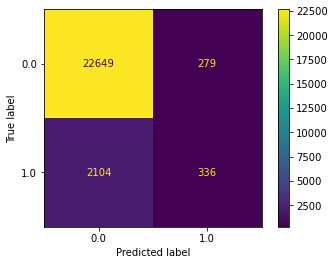

In [112]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

c:\Users\W1000\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


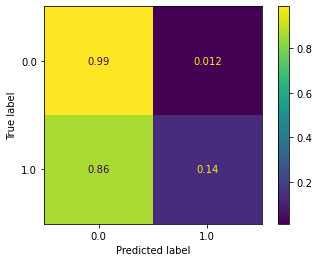

In [113]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     22928
         1.0       0.55      0.14      0.22      2440

    accuracy                           0.91     25368
   macro avg       0.73      0.56      0.58     25368
weighted avg       0.88      0.91      0.88     25368



In [115]:
X_train.iloc[0]

0      0.0
1      0.0
2      1.0
3     30.0
4      0.0
5      0.0
6      0.0
7      1.0
8      1.0
9      1.0
10     0.0
11     1.0
12     0.0
13     3.0
14     0.0
15     0.0
16     0.0
17     1.0
18     5.0
19     5.0
20     8.0
Name: 94841, dtype: float64

In [116]:
y_train.iloc[0]

0.0

In [117]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0.0860081, 0.9139919]])

In [118]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1.])

### Evaluating Curves and AUC

In [119]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

c:\Users\W1000\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


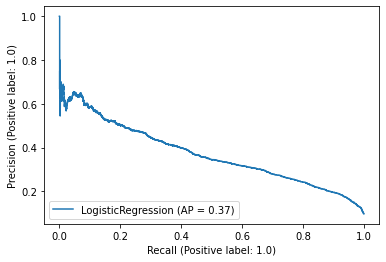

In [120]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [121]:
plot_roc_curve(log_model,scaled_X_test,y_test)

c:\Users\W1000\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


## KNN

### Train|Test Split and Scaling Data

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [123]:
X = df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
scaler = StandardScaler()

In [126]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [129]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Understanding KNN and Choosing K Value

In [130]:
full_test = pd.concat([X_test,y_test],axis=1)

In [131]:
len(full_test)

76104

### Model Evaluation

In [132]:
y_pred = knn_model.predict(scaled_X_test)

In [133]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [134]:
accuracy_score(y_test,y_pred)

0.860151897403553

In [135]:
confusion_matrix(y_test,y_pred)

array([[63716,  5291],
       [ 5352,  1745]], dtype=int64)

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     69007
         1.0       0.25      0.25      0.25      7097

    accuracy                           0.86     76104
   macro avg       0.59      0.58      0.58     76104
weighted avg       0.86      0.86      0.86     76104



### Using Elbow Method for Choosing Reasonable K Values

In [137]:
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")


Text(0.5, 0, 'K Value')

Chosen K value = 6

### Final Model

In [140]:
from sklearn.pipeline import Pipeline

In [141]:
scaler = StandardScaler()
knn6 = KNeighborsClassifier(n_neighbors=6)
operations = [('scaler',scaler),('knn6',knn6)]

In [142]:
pipe = Pipeline(operations)

In [143]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn6', KNeighborsClassifier(n_neighbors=6))])

In [144]:
pipe_pred = pipe.predict(X_test)

In [145]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     69007
         1.0       0.44      0.09      0.15      7097

    accuracy                           0.90     76104
   macro avg       0.67      0.54      0.55     76104
weighted avg       0.87      0.90      0.88     76104



In [146]:
single_sample = X_test.iloc[40]
single_sample

0      0.0
1      0.0
2      1.0
3     28.0
4      1.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     0.0
11     1.0
12     0.0
13     5.0
14     0.0
15    30.0
16     1.0
17     1.0
18    12.0
19     5.0
20     5.0
Name: 48851, dtype: float64

In [147]:
pipe.predict(single_sample.values.reshape(1, -1))

array([0.])

In [148]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[0.5, 0.5]])

# SVM

Feature enginnering for SVM

In [149]:
df.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0  

[5 rows x 22 columns]

In [150]:
import seaborn as sns
data_for_vis = df.sample(1000)
g = sns.PairGrid(data_for_vis, hue='HeartDiseaseorAttack')
g.map_diag(sns.kdeplot)
g.map_lower(sns.barplot)
g.map_upper(sns.histplot)
g.add_legend(title="", adjust_subtitles=True)

c:\Users\W1000\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


In [151]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:>

In [152]:
corr

HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299  -0.009929   
Stroke                            0.203002  0.129575  0.092620   0.024158   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                     -0.087299 -0.125267 -0.078046   0.004190   
Fruits                           -0.019790 -0.040555 -0.040859   0.023849   
Veggies                          -0.039167 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump                -0.028991 -0.003972 -0.011543  -0.023730   
AnyHealthcare                     0.018734  0.038425  0.042230   0.117626   
NoDocbcCost                       0.031000  0.017358  0.013310  -0.058255   
GenHlth                           0.258383  0.300530  0.208426   0.046589   
MentHlth                          0.064621  0.056456  0.062069  -0.008366   
PhysHlth                          0.181698  0.161212  0.121751   0.031775   
DiffWalk                          0.212709  0.223618  0.144672   0.040585   
Sex                               0.086096  0.052207  0.031205  -0.022115   
Age                               0.221618  0.344452  0.272318   0.090321   
Education                        -0.099600 -0.141358 -0.070802   0.001510   
Income                           -0.141011 -0.171235 -0.085459   0.014259   

                           BMI    Smoker    Stroke  Diabetes  PhysActivity  \
HeartDiseaseorAttack  0.052904  0.114441  0.203002  0.180272     -0.087299   
HighBP                0.213748  0.096991  0.129575  0.271596     -0.125267   
HighChol              0.106722  0.091299  0.092620  0.209085     -0.078046   
CholCheck             0.034495 -0.009929  0.024158  0.067546      0.004190   
BMI                   1.000000  0.013804  0.020153  0.224379     -0.147294   
Smoker                0.013804  1.000000  0.061173  0.062914     -0.087401   
Stroke                0.020153  0.061173  1.000000  0.107179     -0.069151   
Diabetes              0.224379  0.062914  0.107179  1.000000     -0.121947   
PhysActivity         -0.147294 -0.087401 -0.069151 -0.121947      1.000000   
Fruits               -0.087518 -0.077666 -0.013389 -0.042192      0.142756   
Veggies              -0.062275 -0.030678 -0.041124 -0.058972      0.153150   
HvyAlcoholConsump    -0.048736  0.101619 -0.016950 -0.057882      0.012392   
AnyHealthcare        -0.018471 -0.023251  0.008776  0.015410      0.035505   
NoDocbcCost           0.058206  0.048946  0.034804  0.035436     -0.061638   
GenHlth               0.239185  0.163143  0.177942  0.302587     -0.266186   
MentHlth              0.085310  0.092196  0.070172  0.073507     -0.125587   
PhysHlth              0.121141  0.116460  0.148944  0.176287     -0.219230   
DiffWalk              0.197078  0.122463  0.176567  0.224239     -0.253174   
Sex                   0.042950  0.093662  0.002978  0.031040      0.032482   
Age                  -0.036618  0.120641  0.126974  0.185026     -0.092511   
Education            -0.103932 -0.161955 -0.076009 -0.130517      0.199658   
Income               -0.100069 -0.123937 -0.128599 -0.171483      0.198539   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
HeartDiseaseorAttack -0.019790  ...       0.018734     0.031000  0.258383   
HighBP               -0.040555  ...       0.038425     0.017358  0.300530   
HighChol             -0.040859  ...       0.042230     0.013310  0.208426   
CholCheck             0.023849  ...       0.117626    -0.058255  0.046589   
BMI                  -0.087518  ...      -0.018471     0.058206  0.239

In [153]:
corr['HeartDiseaseorAttack'] 

HeartDiseaseorAttack    1.000000
HighBP                  0.209361
HighChol                0.180765
CholCheck               0.044206
BMI                     0.052904
Smoker                  0.114441
Stroke                  0.203002
Diabetes                0.180272
PhysActivity           -0.087299
Fruits                 -0.019790
Veggies                -0.039167
HvyAlcoholConsump      -0.028991
AnyHealthcare           0.018734
NoDocbcCost             0.031000
GenHlth                 0.258383
MentHlth                0.064621
PhysHlth                0.181698
DiffWalk                0.212709
Sex                     0.086096
Age                     0.221618
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64

In [154]:
abs(corr['HeartDiseaseorAttack'] ) > 0.2

HeartDiseaseorAttack     True
HighBP                   True
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                   True
Diabetes                False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                  True
MentHlth                False
PhysHlth                False
DiffWalk                 True
Sex                     False
Age                      True
Education               False
Income                  False
Name: HeartDiseaseorAttack, dtype: bool

>Only use columns with some realvent correaltion value.

In [155]:
corr[abs(corr['HeartDiseaseorAttack'] ) > 0.2]['HeartDiseaseorAttack']

HeartDiseaseorAttack    1.000000
HighBP                  0.209361
Stroke                  0.203002
GenHlth                 0.258383
DiffWalk                0.212709
Age                     0.221618
Name: HeartDiseaseorAttack, dtype: float64

In [156]:
columns_to_use = corr[abs(corr['HeartDiseaseorAttack'] ) > 0.2]['HeartDiseaseorAttack'].index
columns_to_use

Index(['HeartDiseaseorAttack', 'HighBP', 'Stroke', 'GenHlth', 'DiffWalk',
       'Age'],
      dtype='object')

In [157]:
# NOw only use these columns for SVM
data = df[columns_to_use]

In [158]:
data.head()
data.shape

(253680, 6)

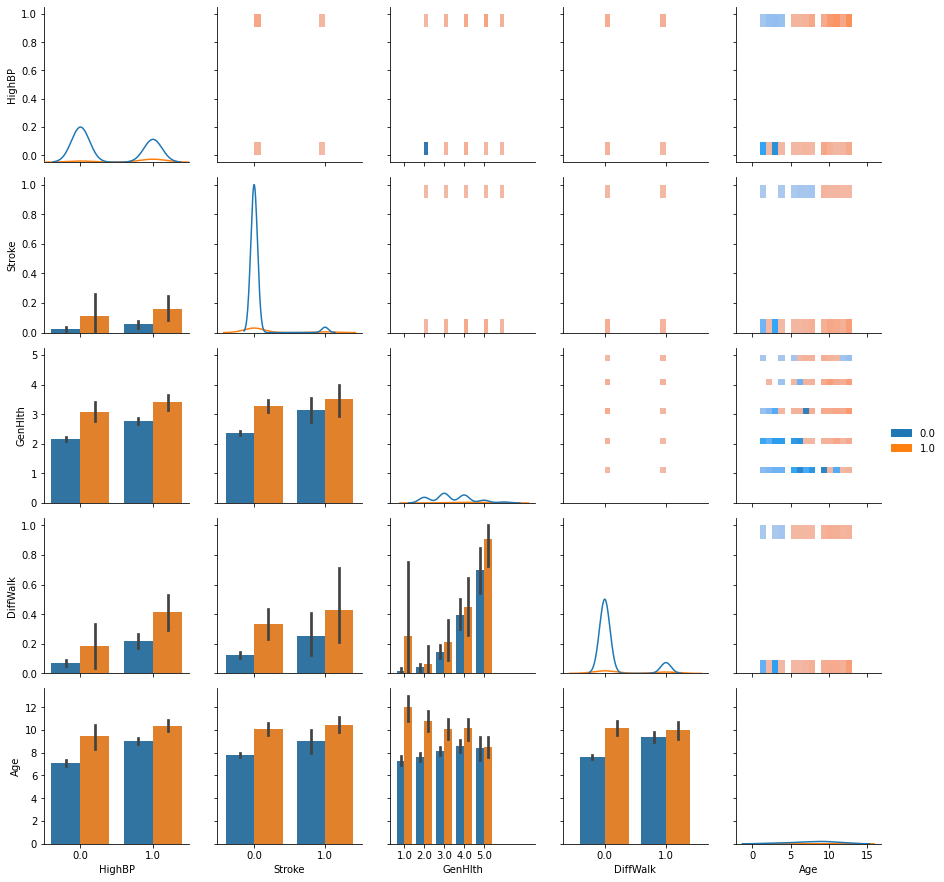

In [159]:
data_for_vis = data.sample(1000)
g = sns.PairGrid(data_for_vis, hue='HeartDiseaseorAttack')
g.map_diag(sns.kdeplot)
g.map_lower(sns.barplot)
g.map_upper(sns.histplot)
g.add_legend(title="", adjust_subtitles=True)


## SVM

In [160]:
from sklearn.preprocessing import StandardScaler
def scale(df_train:pd.DataFrame, df_test:pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    # df_train_with_nemeric = df_train.select_dtypes('number')

    # df_test_with_nemeric = df_test.select_dtypes('number')
    # cols = df_train_with_nemeric.columns
    # df_train_rest = df_train.loc[:, ~df_train.columns.isin(cols)]
    # df_test_rest = df_test.loc[:, ~df_test.columns.isin(cols)]
    # scaler = StandardScaler()
    # scaler.fit(df_train_with_nemeric)
    # train = pd.DataFrame(scaler.transform(df_train_with_nemeric.values))
    # test = pd.DataFrame(scaler.transform(df_test_with_nemeric.values))
    # train.columns = cols
    # test.columns = cols
    df = df_train
    scaler = StandardScaler()
    
    numeric_cols = list(df.dtypes[df.dtypes != 'object'].index)
    scaler.fit_transform(df.loc[:,numeric_cols])
    df.loc[:,numeric_cols] = scaler.transform(df.loc[:,numeric_cols])
    df_test.loc[:, numeric_cols] = scaler.transform(df_test.loc[:,numeric_cols])
    return df, df_test

In [161]:
### ! og_test has no predict column
from sklearn.model_selection import train_test_split
label = 'HeartDiseaseorAttack'
y = data[label]
X = data.drop(label, axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# scale the data
X_train, X_test = scale(X_train, X_test)
# feautre engineer

In [162]:
from sklearn.svm import SVC  # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm, param_grid)
# Note again we didn't split Train|Test
grid.fit(X_train, y_train)
# 100% accuracy (as expected)
grid.best_score_
print(f'best_score:{grid.best_score_}, params: {grid.best_params_}')

In [ ]:
res = pd.DataFrame(grid.cv_results_)
res


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      27.395386      6.703624         1.338977        0.040245    0.01   
1      29.451221     21.062089         0.848271        0.360950    0.01   
2      45.451808     11.421618         1.282527        0.057796     0.1   
3     102.955034     40.450001         1.073418        0.031879     0.1   
4      58.731288      7.226618         1.215862        0.064617       1   
5     308.767079     68.654662         1.161381        0.041932       1   

  param_kernel                           params  split0_test_score  \
0       linear  {'C': 0.01, 'kernel': 'linear'}           0.905910   
1          rbf     {'C': 0.01, 'kernel': 'rbf'}           0.907537   
2       linear   {'C': 0.1, 'kernel': 'linear'}           0.905910   
3          rbf      {'C': 0.1, 'kernel': 'rbf'}           0.907438   
4       linear     {'C': 1, 'kernel': 'linear'}           0.905910   
5          rbf        {'C': 1, 'kernel': 'rbf'}           0.907413   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.905910           0.905910           0.905910           0.905933   
1           0.794772           0.907068           0.282195           0.907411   
2           0.905910           0.905910           0.905910           0.905933   
3           0.907610           0.907290           0.906871           0.907362   
4           0.905910           0.905910           0.905910           0.905933   
5           0.907610           0.907216           0.906945           0.907460   

   mean_test_score  std_test_score  rank_test_score  
0         0.905915        0.000009                3  
1         0.759797        0.242748                6  
2         0.905915        0.000009                3  
3         0.907314        0.000246                2  
4         0.905915        0.000009                3  
5         0.907329        0.000230                1

In [ ]:
ans = grid.predict(X_test)


In [ ]:
import sklearn
err = sklearn.metrics.mean_squared_error(y_test, ans)
acc = 1 - err
print(err, acc)


0.09334594765058342 0.9066540523494165


In [ ]:
print(f'Acheived accuracy: {acc}')

Acheived accuracy: 0.9066540523494165


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


In [ ]:
print(classification_report(y_test,y_pred))

# liner regression: 85.5
# pretty good recal nd f1 score
# knn: 94 with k =9
# good recal and f1
# svm: liner: 93.5

# dataset heart diseases
# liner reg: 90
# knn: 90: k =6
# SVM: 91: non liner

# Dataset 3 Income
# liner 84
knn: 84 k=15
svm: liner, 84